# Coursework 9

### Import required Python libraries



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


import skimage
from skimage import color
from skimage import transform 


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Reshape, Conv2DTranspose, Dropout
from tensorflow.keras.layers import MaxPooling2D, Softmax
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from itertools import combinations

## Dataset loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import data
input_train = np.load('drive/My Drive/Colab Notebooks/CW10/20faces-cropeed-train-128x128.npy')
output_train = np.load('drive/My Drive/Colab Notebooks/CW10/20faces-cropeed-trainlbl-128x128.npy')
input_test = np.load('drive/My Drive/Colab Notebooks/CW10/20faces-cropeed-test-128x128.npy')
output_test = np.load('drive/My Drive/Colab Notebooks/CW10/20faces-cropeed-testlbl-128x128.npy')

In [0]:
# convert label to one hot style
output_train = tf.keras.utils.to_categorical(output_train, 20)
output_test = tf.keras.utils.to_categorical(output_test, 20)

## Task 1

In [0]:
# import a pretrained network from ResNet
First_part = tf.keras.applications.ResNet152V2(input_shape=(128,128,3),include_top=False,weights='imagenet')
First_part_out = First_part.output
# add some dense layers to the first part
dense = tf.keras.layers.GlobalAveragePooling2D()(First_part_out)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(512, activation='relu')(dense)
model_out = tf.keras.layers.Dense(20, activation ='softmax')(dense)
model = tf.keras.models.Model(inputs=First_part.input, outputs=model_out)

In [6]:
# check the number of layers
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 pool1_pad
4 pool1_pool
5 conv2_block1_preact_bn
6 conv2_block1_preact_relu
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 conv2_block1_2_bn
13 conv2_block1_2_relu
14 conv2_block1_0_conv
15 conv2_block1_3_conv
16 conv2_block1_out
17 conv2_block2_preact_bn
18 conv2_block2_preact_relu
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_pad
23 conv2_block2_2_conv
24 conv2_block2_2_bn
25 conv2_block2_2_relu
26 conv2_block2_3_conv
27 conv2_block2_out
28 conv2_block3_preact_bn
29 conv2_block3_preact_relu
30 conv2_block3_1_conv
31 conv2_block3_1_bn
32 conv2_block3_1_relu
33 conv2_block3_2_pad
34 conv2_block3_2_conv
35 conv2_block3_2_bn
36 conv2_block3_2_relu
37 max_pooling2d
38 conv2_block3_3_conv
39 conv2_block3_out
40 conv3_block1_preact_bn
41 conv3_block1_preact_relu
42 conv3_block1_1_conv
43 conv3_block1_1_bn
44 conv3_block1_1_relu
45 conv3_block1_2_pad
46 

In [0]:
# set layers in the first part to non trainable
for layer in model.layers[:564]:
  layer.trainable = False
for layer in model.layers[564:]:
  layer.trainable = True

In [17]:
# train weight in layers in latter part
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(input_train, output_train, \
                        batch_size=32, \
                        epochs=5, \
                        validation_split=0.0, \
                        shuffle=True)

Epoch 1/5
173/173 [==============================] - 19s 110ms/step - loss: 0.7313 - categorical_accuracy: 0.8126
Epoch 2/5
173/173 [==============================] - 19s 109ms/step - loss: 0.4152 - categorical_accuracy: 0.8817
Epoch 3/5
173/173 [==============================] - 19s 109ms/step - loss: 0.3198 - categorical_accuracy: 0.9048
Epoch 4/5
173/173 [==============================] - 19s 109ms/step - loss: 0.2634 - categorical_accuracy: 0.9229
Epoch 5/5
173/173 [==============================] - 19s 109ms/step - loss: 0.1999 - categorical_accuracy: 0.9415


In [20]:
# calculate test accuracy
evaluate_model = model.evaluate(x=input_test, y=output_test)
print('test accuracy = ', evaluate_model[1])

43/43 [==============================] - 5s 106ms/step - loss: 1.4520 - categorical_accuracy: 0.7309
test accuracy =  0.7309091091156006


In [0]:
predict = model.predict(input_test)

In [0]:
row_maxes = predict.max(axis=1).reshape(-1, 1)
predict[:] = np.where(predict == row_maxes, 1, 0)

true labal=  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted labal=  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


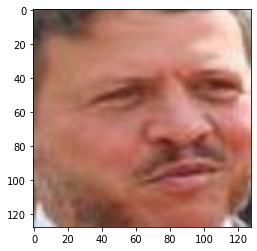

In [36]:
# show an example of correctly predicted image
plt.imshow(input_test[1])
print('true labal= ', output_test[1])
print('predicted labal= ', predict[1])

true labal=  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted labal=  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


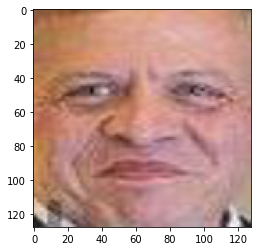

In [37]:
# show an example of wrongly predicted image
plt.imshow(input_test[0])
print('true labal= ', output_test[0])
print('predicted labal= ', predict[0])

## Task 2

In [0]:
# import a network with random weights from ResNet
First_part = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False,weights=None)
First_part_out = First_part.output
# add some dense layers
dense = tf.keras.layers.GlobalAveragePooling2D()(First_part_out)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(1024, activation='relu')(dense)
dense = tf.keras.layers.Dense(512, activation='relu')(dense)
model_out = tf.keras.layers.Dense(20, activation ='softmax')(dense)
model = tf.keras.models.Model(inputs=First_part.input, outputs=model_out)

In [0]:
# make sure that every layers are trainable
for layer in model.layers:
  layer.trainable = True

In [42]:
# train the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(input_train, output_train, \
                        batch_size=32, \
                        epochs=30, \
                        validation_split=0.0, \
                        shuffle=True)

Epoch 1/30
173/173 [==============================] - 28s 161ms/step - loss: 1.8776 - categorical_accuracy: 0.3931
Epoch 2/30
173/173 [==============================] - 28s 161ms/step - loss: 1.6192 - categorical_accuracy: 0.4775
Epoch 3/30
173/173 [==============================] - 28s 161ms/step - loss: 1.4628 - categorical_accuracy: 0.5364
Epoch 4/30
173/173 [==============================] - 28s 162ms/step - loss: 1.3515 - categorical_accuracy: 0.5687
Epoch 5/30
173/173 [==============================] - 28s 161ms/step - loss: 1.2247 - categorical_accuracy: 0.6089
Epoch 6/30
173/173 [==============================] - 28s 162ms/step - loss: 1.0973 - categorical_accuracy: 0.6486
Epoch 7/30
173/173 [==============================] - 28s 163ms/step - loss: 0.9726 - categorical_accuracy: 0.6930
Epoch 8/30
173/173 [==============================] - 28s 163ms/step - loss: 0.8514 - categorical_accuracy: 0.7353
Epoch 9/30
173/173 [==============================] - 28s 162ms/step - loss: 0.7

In [44]:
# calculate test accuracy
evaluate_model = model.evaluate(x=input_test, y=output_test)
print('test accuracy = ', evaluate_model[1])

43/43 [==============================] - 2s 47ms/step - loss: 1.3119 - categorical_accuracy: 0.7258
test accuracy =  0.7258181571960449


Both models for task 1 and 2 generate similar test accuracy. Considering the cost for training a model, it seems to be wiser to 